In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [59]:
#bring in the  packages
df1 = pd.read_csv("imdb_video_game_rating 2.csv")

In [60]:
#descriptive  summary
display(df1.head())

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."


In [61]:
df1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0  title   year  genre  rating  votes  directors   plot
0           False  False  False  False   False  False      False  False
1           False  False  False  False   False  False      False  False
2           False  False  False  False   False  False      False  False
3           False  False  False  False   False  False      False  False
4           False  False  False  False   False  False      False  False
...           ...    ...    ...    ...     ...    ...        ...    ...
12630       False  False  False  False   False  False      False  False
12631       False  False  False  False   False  False      False  False
12632       False  False  False  False   False  False      False  False
12633       False  False  False  False   False  False      False  False
12634       False  False  False  False   False  False      False  False

[12635 rows x 8 columns]>

In [62]:
df1.dropna()

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...,...
12630,12633,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,12634,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,12635,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,12636,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


In [16]:
#drop the duplicate values
dups=df.duplicated()
df[dups]

,Unnamed: 0,title,year,genre,rating,votes,directors,plot


In [63]:
df1.drop_duplicates()

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...,...
12630,12633,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,12634,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,12635,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,12636,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


In [101]:
#covert year and votes
years_list=df1.year.value_counts().index
print("all the years from dataset")
display(years_list)
print()

all the years from dataset


Float64Index([   0.7498897865377059,  0.012525804801282955,
                 0.5783029113077376,    0.4101587708126043,
                -1.1020908260155062,   0.10309206809543302,
                -0.2810835906201157,   -0.5807782428020463,
                -0.1199384460933042,   0.38369078166283016,
                -1.2221322685668288,    0.8964322809500739,
               0.018627957299965102,    -1.758240584780849,
                  1.089832488613853,    -1.361932316350498,
                -0.4462633366430282,   -0.3203306674509538,
               -0.05046851414339714,    1.3914438544838286,
               -0.09584361395148247,    1.3817868705946588,
                 2.1262610531011013,   0.06383519281676532,
                -0.8975062008452284,   0.21836127764473814,
                -1.8066536816817693,  -0.30964748170640966,
                 1.1257733112524981,    0.8037118653766981,
                 0.4165585619075031,   -0.7886982977533276,
                 1.5772172776032904,    

In [99]:
#extract incorrect years
incorrect_years=[year for year in years_list if (not year.startswith('1')) if (not year.startswith('2'))]
display('incorrect years', incorrect_years)

'incorrect years'

['I)', 'II)', 'III)', 'IV)', 'Video']

In [66]:
#data summery
df1.describe(include='all')

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
count,12635.000000,12635,12635,12635,12635.000000,12635,12635,12635
unique,NaN,12309,63,391,NaN,1638,4160,9016
top,NaN,Donkey Kong,2017,Action,NaN,7,Missing,Missing
freq,NaN,6,454,1402,NaN,400,6491,3588
mean,6317.319747,NaN,NaN,NaN,6.945105,NaN,NaN,NaN
std,3648.018413,NaN,NaN,NaN,1.254719,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,3158.500000,NaN,NaN,NaN,6.300000,NaN,NaN,NaN
50%,6317.000000,NaN,NaN,NaN,7.200000,NaN,NaN,NaN
75%,9475.500000,NaN,NaN,NaN,7.800000,NaN,NaN,NaN


In [67]:
#contengency table 1
data_crosstab=pd.crosstab(df1['genre'],
df1['rating'], margins=False)
print(data_crosstab)

rating                     1.0  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0  \
genre                                                                         
Action                       0    0    0    0    2    2    1    2    1    4   
Action, Adventure            0    0    0    0    0    0    1    1    0    0   
Action, Adventure, Comedy    0    0    0    0    0    0    0    0    0    0   
Action, Adventure, Crime     0    0    0    0    0    0    0    0    0    0   
Action, Adventure, Drama     0    0    0    0    0    0    0    0    0    0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Short, Family, Sport         0    0    0    0    0    0    0    0    0    0   
Sport                        0    0    0    0    0    0    0    0    0    0   
Thriller                     0    0    0    0    0    0    0    0    0    0   
War                          0    0    0    0    0    0    0    0    0    0   
Western                      0    0    0    0    0  

In [68]:
#contengency table 2
data_crosstab=pd.crosstab(df1['genre'],
df1['votes'], margins=False)
print(data_crosstab)

votes                      1,001  1,003  1,005  1,007  1,010  1,011  1,014  \
genre                                                                        
Action                         0      0      0      0      0      0      0   
Action, Adventure              0      0      0      0      0      0      0   
Action, Adventure, Comedy      0      1      0      1      0      1      0   
Action, Adventure, Crime       1      0      0      0      0      0      0   
Action, Adventure, Drama       0      0      0      0      0      0      0   
...                          ...    ...    ...    ...    ...    ...    ...   
Short, Family, Sport           0      0      0      0      0      0      0   
Sport                          0      0      0      0      0      0      0   
Thriller                       0      0      0      0      0      0      0   
War                            0      0      0      0      0      0      0   
Western                        0      0      0      0      0    

In [91]:
# extracting games
games_year_incorrect=df1.loc[df1['year'].isin(incorrect_years)]
print("number of game respect to incorrect year is",len(games_year_incorrect))


number of game respect to incorrect year is 0


In [70]:
df1.loc[df1['year'].isin(incorrect_years),'year']= np.nan

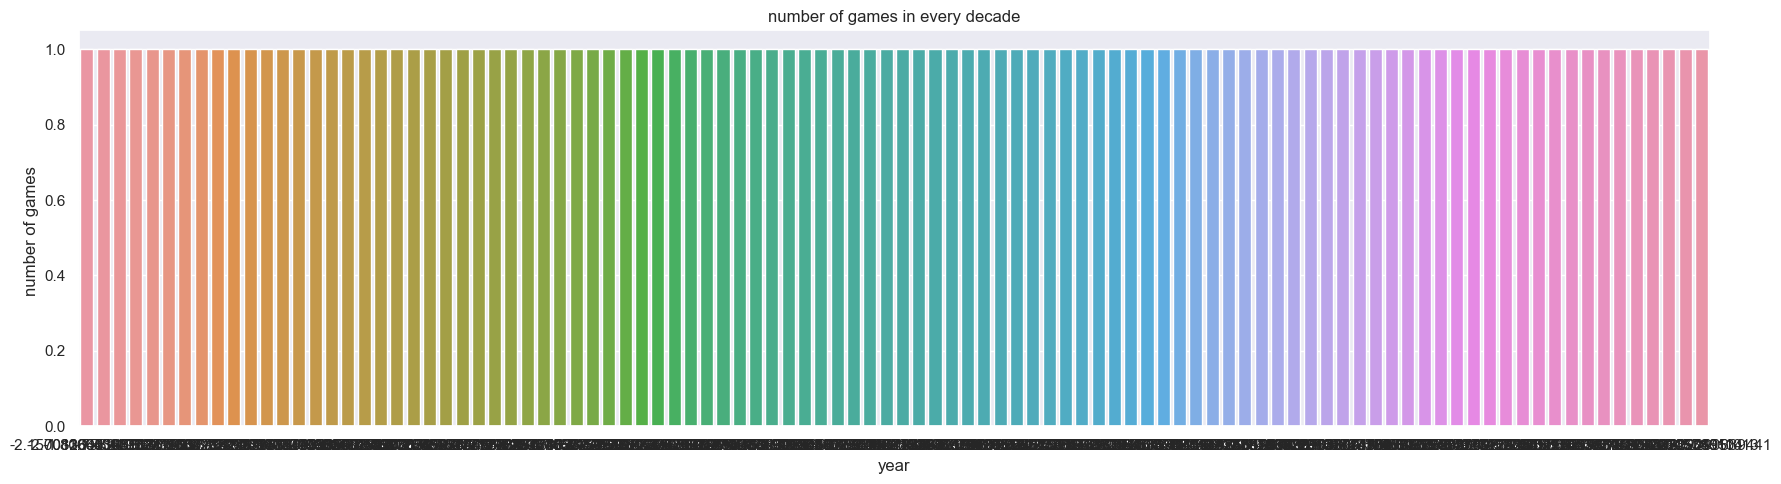

In [95]:
#visualization
sns.set()
fig, ax=plt.subplots(figsize=(18,5))
sns.countplot(x='year', data=df1)
ax.set(title='number of games in every decade', xlabel= 'year', ylabel='number of games ')
plt.tight_layout()
plt.show()


In [72]:
print('10 highest rated games')
df1.nlargest(10,'rating')

10 highest rated games


,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
5,5,Mass Effect: Legendary Edition,2021,"Action, Adventure, Sci-Fi",9.7,"1,628","Casey Hudson, Mac Walters",A compilation of the first three Mass Effect g...
6,6,God of War,2018,"Action, Adventure, Drama",9.6,"26,507",Cory Barlog,"After wiping out the gods of Mount Olympus, Kr..."
7,7,Persona 5 Royal,2019,"Action, Adventure, Fantasy",9.6,"1,214",Daiki Itô,A group of high school students create a vigil...
8,8,The Legend of Zelda: Ocarina of Time,1998,"Action, Adventure, Fantasy",9.6,"9,576","Eiji Aonuma, Yoichi Yamada, Yoshiaki Koizumi, ...",A young Kokiri boy discovers that his destiny ...
9,9,Metal Gear Solid,1998,"Action, Adventure, Drama",9.6,"11,809",Hideo Kojima,A crack government anti-terrorist squad takes ...


In [73]:
import pandas as pd
year_data=pd.Series([2022,2016,2009,2018,1999])
year_data.value_counts()

2022    1
2016    1
2009    1
2018    1
1999    1
dtype: int64

(array([ 221.93131537,  388.37980189,  721.27677494,  943.20809031,
         943.20809031, 1165.13940567,  554.82828842,  332.89697305,
         166.44848652,  110.96565768]),
 array([-2.15701365, -1.69289205, -1.22877046, -0.76464887, -0.30052727,
         0.16359432,  0.62771592,  1.09183751,  1.5559591 ,  2.0200807 ,
         2.48420229]),
 <BarContainer object of 10 artists>)

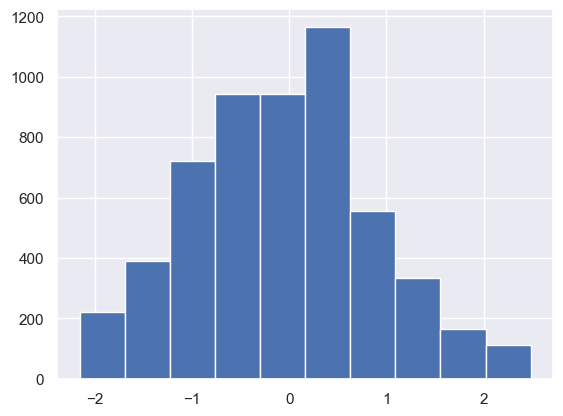

In [74]:
#histogram plot
from matplotlib.pyplot import hist
df1=pd.DataFrame({
    'year': np.random.randn(100),
    'rating':100*np.random.rand()
})
hist(df1.year,weights=df1.rating)

In [75]:
print('10lowest rating games')
df1.nsmallest(10,'rating')

10lowest rating games


,year,rating
0,0.749890,55.482829
1,-1.758241,55.482829
2,-0.347368,55.482829
3,0.228014,55.482829
4,-0.518910,55.482829
5,-0.338836,55.482829
6,-0.404765,55.482829
7,-0.624617,55.482829
8,-0.812565,55.482829
9,0.819028,55.482829


In [76]:
df3=pd.DataFrame(df1)
print(df3.median())

year      -0.055533
rating    55.482829
dtype: float64


In [79]:
df3.info

<bound method DataFrame.info of         year     rating
0   0.749890  55.482829
1  -1.758241  55.482829
2  -0.347368  55.482829
3   0.228014  55.482829
4  -0.518910  55.482829
..       ...        ...
95 -0.788698  55.482829
96  0.416559  55.482829
97  0.803712  55.482829
98  1.125773  55.482829
99  1.182677  55.482829

[100 rows x 2 columns]>

In [80]:
df3.dtypes

year      float64
rating    float64
dtype: object

In [83]:
df3=pd.DataFrame(df1)
variance=df3['rating'].var()
print(variance)
print('df3.var()')

1.274926715508706e-27
df3.var()


<AxesSubplot:ylabel='Density'>

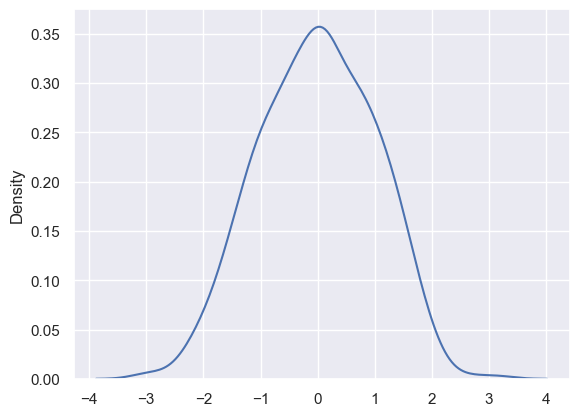

In [85]:
#normal distributing
from numpy import random
sns.distplot(random.normal(size=500),hist=False)